# Reasons for the company unprofitability

**Input data:** Data is available for users acquired during advertising campaigns from May 1 to October 27, 2019 for the Procrastinate Pro + entertainment app. Despite huge investments in advertising, the company has been losing money for the past few months.

Data files include:
- server log with data about users visits,
- data about their purchases for this period,
- advertising costs.

**Goal of the project:** to understand the reasons for the company's losses and help it to become profitable.


**Tasks:**
- find out where users come from and what devices they use;
- calculate how much it costs to attract users from various advertising channels;
- calculate how much money each client brings;
- determine when the cost of attracting a client pays off;
- find out what factors hinder customer acquisition.

In [1]:
# Load required libraries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

### 1. Loading and preparing data for analysis

#### 1.1 Reading files

In [2]:
# Reading files

visits, orders, ad_costs = (
    pd.read_csv('...'),   # sessions log
    pd.read_csv('...'),   # orders
    pd.read_csv('...'),   # advertising spending
   )

In [3]:
# First 10 rows of datasets
display(visits.head(10))
display(orders.head(10))
ad_costs.head(10)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


In [4]:
# General information about datasets
print(visits.info())
print()
print(orders.info())
print()
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #

There are a number of data issues:

1) Names of variables - it is necessary to lower case and get rid of spaces;

2) The `User Id ` data type must be changed from int to str as it is a categorical variable;

3) Data type `Session Start`, `Session End`, `Event Dt`, `dt` - must be converted to datetime type;

4) Additionally, we lowercase the values of all categorical variables (`Region`, `Device`, `Channel`) to avoid the appearance of implicit duplicates.


#### 1.2 Variable names

In [5]:
# Changing case for variable names
# and replacing variable names containing spaces with underscores
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
ad_costs.columns = ad_costs.columns.str.lower().str.replace(' ', '_')

# Display variable names
print(visits.columns)
print(orders.columns)
ad_costs.columns 

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')
Index(['user_id', 'event_dt', 'revenue'], dtype='object')


Index(['dt', 'channel', 'costs'], dtype='object')

#### 1.3 Data types

In [6]:
# Changing data types
visits['user_id'] = visits['user_id'].astype(str)
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

orders['user_id'] = orders['user_id'].astype(str)
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

ad_costs['dt'] = pd.to_datetime(ad_costs['dt']).dt.date

#### 1.4 Categorical variable values

In [7]:
# Changing the type of register for the values of qualitative variables
visits['region'] = visits['region'].str.lower()
visits['device'] = visits['device'].str.lower()
visits['channel'] = visits['channel'].str.lower()

ad_costs['channel'] = ad_costs['channel'].str.lower()

Check their correctness of the transformations.

In [8]:
# General information about datasets
print(visits.info())
print()
print(orders.info())
print()
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  object        
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(4)
memory usage: 14.2+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  object        
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 942.6+ 

In [9]:
# Output the first 10 rows of datasets
display(visits.head(10))
display(orders.head(10))
ad_costs.head(10)

,user_id,region,device,channel,session_start,session_end
0,981449118918,united states,iphone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,united states,iphone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,united states,mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,united states,android,tiptop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,united states,mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,united states,iphone,rocketsuperads,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,united states,android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,united states,iphone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,united states,iphone,rocketsuperads,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,united states,mac,tiptop,2019-05-01 04:39:53,2019-05-01 04:57:05


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


,dt,channel,costs
0,2019-05-01,faceboom,113.3
1,2019-05-02,faceboom,78.1
2,2019-05-03,faceboom,85.8
3,2019-05-04,faceboom,136.4
4,2019-05-05,faceboom,122.1
5,2019-05-06,faceboom,118.8
6,2019-05-07,faceboom,101.2
7,2019-05-08,faceboom,100.1
8,2019-05-09,faceboom,93.5
9,2019-05-10,faceboom,104.5


The changes have been successful.


#### 1.5 Missing values

Let's check the data for missing values.

In [10]:
print(visits.isna().sum())
print()
print(orders.isna().sum())
ad_costs.isna().sum()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

user_id     0
event_dt    0
revenue     0
dtype: int64


dt         0
channel    0
costs      0
dtype: int64

There are no missing values in the data.


#### 1.6 Duplicates

Let's check the data for duplicates.

In [11]:
print(visits.duplicated().sum())
print()
print(orders.duplicated().sum())
ad_costs.duplicated().sum()

0

0


0

There are no obvious duplicates in the data.


#### General dataset structure

**visits** structure:
- `user_id` - unique user ID,
- `region` — user's country,
- `device` — user's device type,
- `channel` — source ID,
- `session_start` — date and time of the start of the session,
- `session_end` — date and time of the end of the session.

**orders** structure:
- `user_id` - unique user ID,
- `event_dt` - date and time of purchase,
- `revenue` — order amount.

**ad_costs** structure:
- `dt` — date of the advertising campaign,
- `channel` — identifier of the advertising source,
- `costs` - costs for this campaign.

#### 1.7 Descriptive statistics

In [12]:
# Checking the time interval
print('visits, session_start:', visits['session_start'].min(),  
                                visits['session_start'].max())
print('visits, session_end:', visits['session_end'].min(),  
                              visits['session_end'].max())
print()
print('orders, event_dt:', orders['event_dt'].min(),  
                           orders['event_dt'].max())
print()
print('ad_costs, dt:', ad_costs['dt'].min(),  
                       ad_costs['dt'].max())

visits, session_start: 2019-05-01 00:00:41 2019-10-31 23:59:23
visits, session_end: 2019-05-01 00:07:06 2019-11-01 01:38:46

orders, event_dt: 2019-05-01 00:28:11 2019-10-31 23:56:56

ad_costs, dt: 2019-05-01 2019-10-27


All tables contain data for the period specified in the project from May 1 to October 27, 2019, however, the orders and visits tables contain data for later dates as well - this can be corrected when calculating metrics, it is not necessary to delete this data now.

In [13]:
# Descriptive statistics for scale variables
print(orders['revenue'].describe())
ad_costs['costs'].describe()

count    40212.000000
mean         5.370608
std          3.454208
min          4.990000
25%          4.990000
50%          4.990000
75%          4.990000
max         49.990000
Name: revenue, dtype: float64


count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64

The statistics for the orders table are generally OK - most of the orders were made for the minimum amount (probably the amount of an application subscription), but there are also orders that exceed the minimum amount by up to 10 times.

The statistics for the ad_costs table look real too - the median spending on an advertising campaign in one source is 12.29, there are very cheap campaigns (0.8), there are those that cost our company a lot (630).

### 2. Set functions to calculate and analyze LTV, ROI, Retention and Conversion.

These are the functions for calculating metric values:

- `get_profiles()` - to create user profiles,
- `get_retention()` - to calculate the Retention Rate,
- `get_conversion()` - for Conversion calculation,
- `get_ltv()` - to calculate LTV.


As well as functions for plotting graphs:

- `filter_data()` - for data smoothing,
- `plot_retention()` - to plot the Retention Rate graph,
- `plot_conversion()` - for plotting a Conversion Rate graph,
- `plot_ltv_roi` - for visualizing LTV and ROI.

#### 2.1 User profiles get_profiles()

In [14]:
# function to create user profiles

def get_profiles(sessions, orders, ad_costs):

    # find the parameters of the first visits
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # for cohort analysis, determine the date of the first visit
    # and the first day of the month in which this visit occurred
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # add a sign of paying users
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # count the number of unique users
    # with the same source and date of attraction
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # combine spending on advertising and the number of attracted users
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # divide advertising costs by the number of attracted users
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # add acquisition cost to profiles
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # organic user acquisition cost is zero
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 

#### 2.2 Retention Rate get_retention()

In [15]:
# function to calculate retention

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # add the payer column to the dimensions list
    dimensions = ['payer'] + dimensions

    # exclude users who did not "survive" to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # collecting raw data to calculate retention
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # function for grouping the table according to the desired features
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # get retention table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # get a table of retention dynamics
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # return both tables and raw data
    return result_raw, result_grouped, result_in_time


#### 2.3 Conversion Rate get_conversion() 

In [16]:
# function for calculating conversion

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # exclude users who did not "survive" to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # determine the date and time of the first purchase for each user
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # add purchase data to profiles
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # calculate lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # group by cohort if there is nothing in dimensions
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # function for grouping the table according to the desired features
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # divide each "cell" in the row by the size of the cohort
        # and get the conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # get the conversion table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # remove 'cohort' from dimensions for the conversion dynamics table
    if 'cohort' in dimensions: 
        dimensions = []

    # get a table of conversion dynamics
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # return both tables and raw data
    return result_raw, result_grouped, result_in_time


#### 2.4 Lifetime value LTV get_ltv()

In [17]:
# function for calculating LTV and ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # exclude users who did not "survive" to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # add purchase data to profiles
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # calculate the user's lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # group by cohort if there is nothing in dimensions
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # grouping function according to the desired features
    def group_by_dimensions(df, dims, horizon_days):
        # build a "triangular" revenue table
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # find the amount of revenue with accumulation
        result = result.fillna(0).cumsum(axis=1)
        # calculate cohort sizes
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # combine cohort sizes and revenue table
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # calculate LTV: divide each "cell" in the row by the size of the cohort
        result = result.div(result['cohort_size'], axis=0)
        # exclude all lifetimes that exceed the analysis horizon
        result = result[['cohort_size'] + list(range(horizon_days))]
        # restore cohort sizes
        result['cohort_size'] = cohort_sizes

        # collect dataframe with user data and CAC values,
        # adding parameters from dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # calculate the average CAC by parameters from dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # calculate ROI: divide LTV by CAC
        roi = result.div(cac['cac'], axis=0)

        # remove rows with infinite ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # restore cohort sizes in the ROI table
        roi['cohort_size'] = cohort_sizes

        # add CAC to ROI table
        roi['cac'] = cac['cac']

        # in the final table keep the sizes of cohorts, CAC
        # and ROI in lifetimes that do not exceed the analysis horizon
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # return LTV and ROI tables
        return result, roi

    # get LTV и ROI tables
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # for dynamics tables remove 'cohort' from dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # get tables of LTV and ROI dynamics
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # raw data
        result_grouped,  # LTV table
        result_in_time,  # LTV dynamics table
        roi_grouped,  # ROI table
        roi_in_time,  # ROI dynamics table
    )


#### 2.5 Data smoothing  filter_data()

In [18]:
# function to smooth the dataframe

def filter_data(df, window):
    # apply a moving average for each column
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df


#### 2.6 Retention Rate graph plot_retention()

In [19]:
# function to visualize retention

def plot_retention(retention, retention_history, horizon, window=7):

    # set the grid size for charts
    plt.figure(figsize=(15, 10))

    # exclude cohort sizes and first day retention
    retention = retention.drop(columns=['cohort_size', 0])
    # keep only the desired lifetime in the dynamics table
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # if there is only payer in the indexes of the retention table,
    # add the second feature - cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # in the graph table - two columns and two rows, four cells
    # in the first one we build retention curves for paying users
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of paying users')

    # in the second cell we build non-paying retention curves
    # vertical axis - from the graph from the first cell
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('lifetime')
    plt.title('Retention of non-paying users')

    # in the third cell - the dynamics of retention for paying users
    ax3 = plt.subplot(2, 2, 3)
    # in the third cell - the dynamics of retention for paying users
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # filter data and plot
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Acquisition date')
    plt.title(
        'Dynamics of retention of paying users on the {}-th day'.format(
            horizon
        )
    )

    # in the fourth cell - the dynamics of retention for non-paying users
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # filter data and plot
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Acquisition date')
    plt.title(
        'Dynamics of retention of non-paying users on the {}-th day'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()
    

#### 2.7 Conversion Rate graph plot_conversion()

In [20]:
# function to visualize the conversion

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # set the grid size for charts
    plt.figure(figsize=(15, 5))

    # exclude cohort sizes
    conversion = conversion.drop(columns=['cohort_size'])
    # keep only the desired lifetime in the dynamics table
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # first chart - conversion curves
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('User conversion')

    # second graph - conversion dynamics
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # all index columns except date will become pivot table columns
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Acquisition date')
    plt.title('Dynamics of user conversion on the {}-th day'.format(horizon))

    plt.tight_layout()
    plt.show()
    

#### 2.8 LTV & ROI graph plot_ltv_roi()

In [21]:
# function to visualize LTV and ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # set the grid for drawing charts
    plt.figure(figsize=(20, 10))

    # exclude cohort sizes from ltv table
    ltv = ltv.drop(columns=['cohort_size'])
    # keep only the desired lifetime in the ltv dynamics table
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # write the cost of attraction in a separate frame
    cac_history = roi_history[['cac']]

    # exclude cohort sizes and cac from roi table
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # keep only the desired lifetime in the roi dynamics table
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # first graph - ltv curves
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('LTV')

    # second graph - ltv dynamics
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # all index columns except date will become pivot table columns
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Acquisition date')
    plt.title('Dynamics of LTV of users on the {}-th day'.format(horizon))

    # the third graph is the dynamics of cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # all index columns except date will become pivot table columns
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Acquisition date')
    plt.title('User Acquisition Cost Dynamics')

    # fourth graph - roi curves
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Payback level')
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('ROI')

    # the fifth graph is the dynamics of roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # all index columns except date will become pivot table columns
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Payback level')
    plt.xlabel('Acquisition date')
    plt.title('Dynamics of ROI on the {}-th day'.format(horizon))

    plt.tight_layout()
    plt.show()
    

### 3. Exploratory data analysis

#### 3.1 User profiles

Let's get user profiles. To do this, we call the get_profiles() function, passing it data on visits, purchases, and spending on Procrastinate Pro+ advertising.

In [22]:
# Get user profiles
profiles = get_profiles(visits, orders, ad_costs)

profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,100002830880,2019-10-17 12:25:34,organic,android,united states,2019-10-17,2019-10-01,False,0.000000
1,10000484057,2019-06-29 20:23:14,lambdamediaads,mac,germany,2019-06-29,2019-06-01,False,0.700000
2,100010021210,2019-07-19 15:29:29,leapbob,pc,uk,2019-07-19,2019-07-01,False,0.215122
3,100018706745,2019-10-16 16:19:26,tiptop,mac,united states,2019-10-16,2019-10-01,False,3.500000
4,100024199374,2019-08-20 15:46:46,organic,android,united states,2019-08-20,2019-08-01,False,0.000000
...,...,...,...,...,...,...,...,...,...
150003,999975439887,2019-10-21 00:35:17,organic,pc,uk,2019-10-21,2019-10-01,False,0.000000
150004,999976332130,2019-07-23 02:57:06,tiptop,iphone,united states,2019-07-23,2019-07-01,False,2.600000
150005,999979924135,2019-09-28 21:28:09,mediatornado,pc,united states,2019-09-28,2019-09-01,False,0.205714
150006,9999813704,2019-08-03 06:41:08,organic,pc,united states,2019-08-03,2019-08-01,False,0.000000


Received 150,008 user profiles, each of them has the date of the first visit, advertising source, device and region from which the first visit was.

In [23]:
# Minimum and maximum date of first visit (from user profiles)
print(profiles['first_ts'].min())
print(profiles['first_ts'].max())

2019-05-01 00:00:41
2019-10-27 23:59:04


Let's define the minimum and maximum dates of the first attraction as May 1 and October 27, 2019, since the dataset stores data for this period.

In [24]:
# Determine the minimum and maximum user acquisition dates
min_date = profiles['first_ts'].min().date()
max_date = profiles['first_ts'].max().date()

#### 3.2 Countries

Let's find out from which countries users come to the application and which country has the most paying users. To do this, we will build a pivot table that reflects the number of users and the share of paying from each country.

In [25]:
# Number of users and share of paying per country
payer_proportion = (
    profiles
    .groupby('region')
    .agg({'user_id': 'nunique',
          'payer': 'mean'})
    .sort_values(by='user_id', ascending=False)
    .rename(columns={'user_id': 'users_total',
                     'payer': 'payer_proportion'})
)

payer_proportion['payer_percent'] = payer_proportion['payer_proportion'] * 100
payer_proportion = payer_proportion.drop('payer_proportion', axis=1)
payer_proportion.style.background_gradient('coolwarm').format({'payer_percent': '{:.2f}'})

,users_total,payer_percent
region,,
united states,100002,6.90
uk,17575,3.98
france,17450,3.80
germany,14981,4.11


*Findings:*

- Visitors come from from the US, Germany, France and the UK.

- Most of all registered and paying users - in the USA (almost 7%).

- Despite the fact that Germany has the fewest registered users, the region ranks second in terms of the share of paying users (4.1%).


#### 3.3 Devices

Let's find out what devices customers use and what devices paying users prefer. To do this, we will build a table that reflects the number of users and the share of paying for each device.

In [26]:
# Number of users and share of paying per device type
payer_proportion = (
    profiles
    .groupby('device')
    .agg({'user_id': 'nunique',
          'payer': 'mean'})
    .sort_values(by='user_id', ascending=False)
    .rename(columns={'user_id': 'users_total',
                     'payer': 'payer_proportion'})
)  

payer_proportion['payer_percent'] = payer_proportion['payer_proportion'] * 100
payer_proportion = payer_proportion.drop('payer_proportion', axis=1)
payer_proportion.style.background_gradient('coolwarm').format({'payer_percent': '{:.2f}'})

,users_total,payer_percent
device,,
iphone,54479,6.21
android,35032,5.85
pc,30455,5.05
mac,30042,6.36


*Findings:*

- Users use iPhone, Android, PC and Mac devices.

- The largest number of clients access the application from iPhone devices.

- Paying users prefer Mac devices more, despite the lowest number of visits from this type of devices (percentage of purchases from Mac - 6.4%).

- iPhone among paying users is in second place (6.2% of purchases).



#### 3.4 Advertising sources

We will also study the advertising sources of attraction and determine the channels from which the most paying users came. To do this, we will build a table that contains the number of users and the share of paying for each acquisition channel.

In [27]:
# Number of users and share of paying for each acquisition channel
payer_proportion = (
    profiles
    .groupby('channel')
    .agg({'user_id': 'nunique',
          'payer': 'mean'})
    .sort_values(by='payer', ascending=False)
    .rename(columns={'user_id': 'users_total',
                     'payer': 'payer_proportion'})
)

payer_proportion['payer_percent'] = payer_proportion['payer_proportion'] * 100
payer_proportion = payer_proportion.drop('payer_proportion', axis=1)
payer_proportion.style.background_gradient('coolwarm').format({'payer_percent': '{:.2f}'})

,users_total,payer_percent
channel,,
faceboom,29144,12.20
adnonsense,3880,11.34
lambdamediaads,2149,10.47
tiptop,19561,9.60
rocketsuperads,4448,7.91
wahoonetbanner,8553,5.30
yrabbit,4312,3.83
mediatornado,4364,3.57
leapbob,8553,3.06


*Findings:*

- Most paying users come from the Facebook channel (12.2% of customers made a purchase).

- However, most users in general (both paying and non-paying) come from the Organic channel - this is good, since these users are free; but they have the lowest percentage of paying users - only 2%.

- Also potentially profitable in terms of a large proportion of paying users are Adnonsense (11.3%), LambdaMediaAds (10.5%) channels, although they attracted much fewer users; as well as TipTop (9.6%).

*Intermediate conclusions:*

User profiles have been compiled:

- Most of all registered and paying users - in the USA (100 thousand users; made purchases - 6.9%).

- Despite the fact that Germany has the fewest registered users, the region ranks second in terms of the share of paying users (15 thousand users; made purchases - 4.1%).

- The largest number of customers enter the application from iPhone devices (54.5 thousand users; make purchases - 6.2%).

- Paying users prefer Mac devices more (percentage of purchases - 6.4%), despite the lowest number of visits from this type of devices (30 thousand).

- Most paying users come from the Facebook channel (12.2% of customers made a purchase; vsggo - 29 thousand users).

- However, most users in general (both paying and not paying) come from the Organic channel (56.5 thousand; the percentage of purchases is 2%).

- Potentially profitable promotion channels: Adnonsense (11.3% of purchases), LambdaMediaAds (10.5%), although they attracted much fewer users; as well as TipTop (9.6%).

### 4. Marketing

#### 4.1 Total spending on marketing

In [28]:
# Total marketing spend
ad_costs_total = ad_costs['costs'].sum()

print('Spent on all advertising campaigns', round(ad_costs_total, 2))

Spent on all advertising campaigns 105497.3


#### 4.2 Advertising sources

Let's find out how spending is distributed across advertising sources, that is, how much money was spent on each source.

In [29]:
# Distribution of advertising spending for each source
ad_costs_per_channel = (
    ad_costs
    .groupby('channel')
    .agg({'costs': 'sum'})
    .sort_values(by='costs', ascending=False)
)

ad_costs_per_channel['percent'] = ad_costs_per_channel['costs'] / ad_costs_total * 100

ad_costs_per_channel.style.background_gradient('coolwarm').format('{:.2f}')

,costs,percent
channel,,
tiptop,54751.30,51.90
faceboom,32445.60,30.75
wahoonetbanner,5151.00,4.88
adnonsense,3911.25,3.71
opplecreativemedia,2151.25,2.04
rocketsuperads,1833.00,1.74
leapbob,1797.60,1.70
lambdamediaads,1557.60,1.48
mediatornado,954.48,0.90


*Findings:*

- More than half of the advertising budget went to the TipTop channel.

- Almost a third of the advertising budget went to the Facebook channel.

- TipTop and Faceboom bring in relatively many paying customers (it was clarified in paragraph 3.4), so this investment may be justified.


#### 4.3 Trends in Marketing Spending by Acquisition Channels

Let's build a visualization of the dynamics of changes in expenses over time (by weeks and months) for each source.

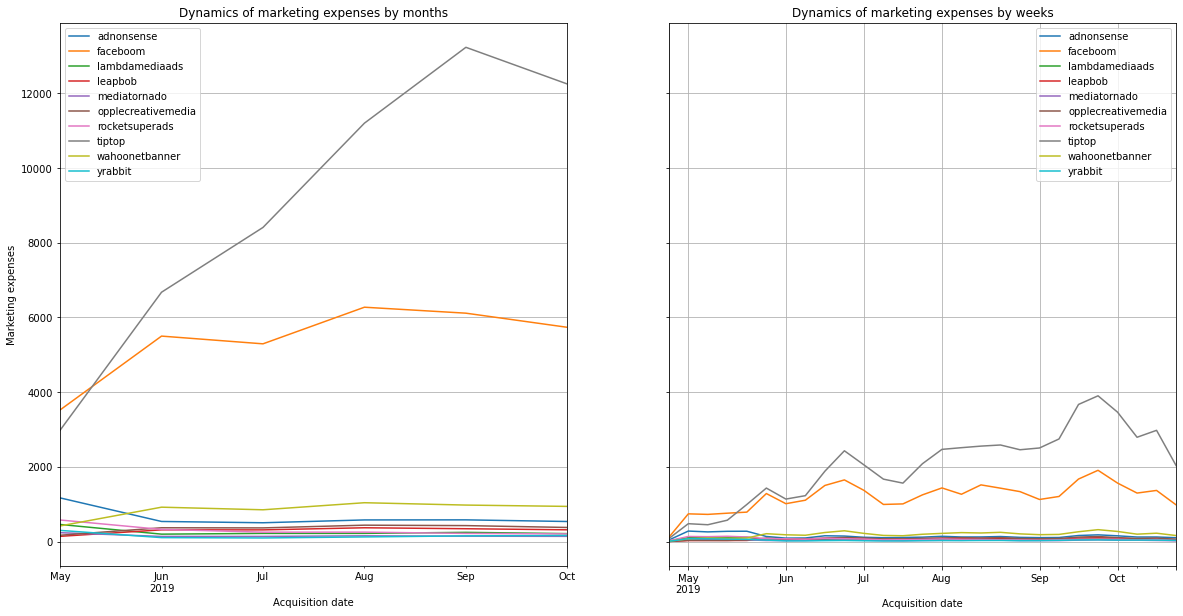

In [30]:
# Set the grid size for charts
plt.figure(figsize=(20, 10))

# History of marketing spending changes by month
ax1 = plt.subplot(1, 2, 1)
ad_costs.pivot_table(index=ad_costs['dt'].astype('datetime64[M]'), 
                     columns='channel',
                     values='costs',
                     aggfunc='sum').plot(grid=True, ax=ax1)
plt.legend()
plt.xlabel('Acquisition date')
plt.ylabel('Marketing expenses')
plt.title('Dynamics of marketing expenses by months')

# History of changes in marketing spend by week
ax2 = plt.subplot(1, 2, 2, sharey = ax1)
ad_costs.pivot_table(index=ad_costs['dt'].astype('datetime64[W]'), 
                     columns='channel',
                     values='costs',
                     aggfunc='sum').plot(grid=True, ax=ax2)
plt.legend()
plt.xlabel('Acquisition date')
plt.ylabel('Marketing expenses')
plt.title('Dynamics of marketing expenses by weeks')

plt.show()

*Graph conclusions:*

- Spendings on TipTop and Faceboom channels significantly exceed the costs of all other promotion channels, and grow strongly every month (perhaps with every advertising campaign). If at the beginning of May about 100 thousand were spent on advertising on TipTop, and 70 thousand on Faceboom, then by the beginning of October 570 and 280 thousand were spent, respectively. It is necessary to check whether such a large investment is justified by looking at the dynamics of CAC.

- Spendings on TipTop and Faceboom channels are growing in sync.

- Synchronicity in spendings, but much less pronounced, can be traced for other channels.

#### 4.4 CAC

Let's find out how much it costs on average to attract one user (CAC) from each source. To do this, we're going to use user profiles.

In [31]:
# Create a table with the amount of spending on marketing and the number of new users
marketing = (
    profiles
    .query('payer == True')
    .groupby('channel')
    .agg({'acquisition_cost': 'sum',
          'user_id': 'nunique'})
    .rename(columns={'user_id': 'users_total'})
)

# Calculate CAC - divide the cost by the number of users
marketing['cac'] = marketing['acquisition_cost'] / marketing['users_total']

marketing = marketing.drop('acquisition_cost', axis=1)

# Display CAC table
(
    marketing
    .sort_values(by='cac', ascending=False)
    .style.background_gradient('coolwarm')
    .format({'cac': '{:.3f}'})
)

,users_total,cac
channel,,
tiptop,1878,2.786
faceboom,3557,1.113
adnonsense,440,1.011
lambdamediaads,225,0.735
wahoonetbanner,453,0.601
rocketsuperads,352,0.418
opplecreativemedia,233,0.250
mediatornado,156,0.217
yrabbit,165,0.211


In [32]:
# Calculate the average CAC for all sources of promotion
print('Average CAC =', 
      round(profiles['acquisition_cost'].sum() / profiles['user_id'].nunique(), 3))

Average CAC = 0.703


*Findings:*

- Average CAC for all sources of promotion - 0.7.

- The average cost per customer acquisition for the TipTop channel is 2.78, which is more than 2.5 times higher than that for Faceboom. Despite the huge investment in the TipTop channel, the cost per user is very high!

- The lowest CAC on Leapbob is over 10x lower than TipTop.

*Intermediate conclusions:*

Marketing expenses were calculated.

- In total, from May 1 to October 27, 2019, 105.5 thousand was spent.

- More than half of all money went to the TipTop channel.

- Spending on TipTop channels ((55k - 51.9% of the budget) and Faceboom (32.4k - 31%) significantly exceeds the costs of all other promotion channels, while growing strongly every month (possibly with each advertising campaign). If in early May, about 100 thousand were spent on advertising on TipTop, and 70 thousand on Faceboom, then by the beginning of October they were already spending 570 and 280 thousand, respectively.

- Spending on TipTop and Faceboom channels grew in sync.

- Synchronicity in spending, but much less pronounced, can be traced for other channels.

- Least of all invested in MediaTornado (954 thousand - 0.9%) and Yrabbit (944 thousand - 0.9%).

### 5 ROI

Let's define the date `observation_date` when we look at the report, as well as the planning horizon: if it is assumed that users should pay off no later than two weeks after the acquisition, we will define `horizon_days` at 14 days.

We will not include organic users in the analysis: the costs of attracting them always pay off, because the advertising budget is not spent on them.

In [33]:
observation_date = datetime(2019, 11, 1).date()       # moment of analysis
horizon_days = 14                                     # analysis horizon
profiles_new = profiles.query('channel != "organic"') # exclude organic users

#### 5.1 Total ROI

Calculate and visualize LTV and ROI by calling the get_ltv() and plot_ltv_roi() functions.

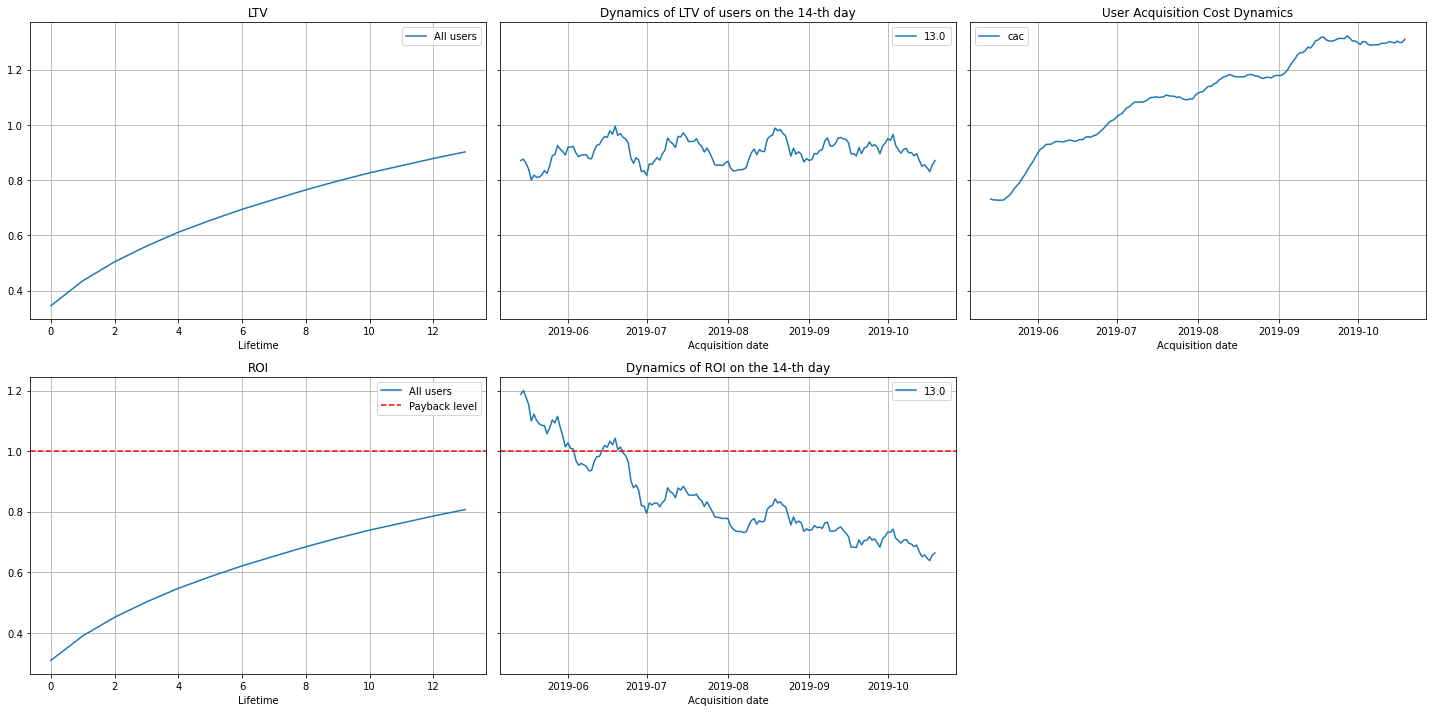

In [34]:
# Calculate LTV and ROI
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_new, orders, observation_date, horizon_days)

# Graphs
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=14)

*Graph Conclusions:*

- Advertising does not pay off. ROI at the end of the two-week period is about 80%.

- Over time, the return on investment falls: in July it was already below the required threshold and did not rise again.

- CAC is constantly increasing. The reason for the unprofitability may be an increase in the advertising budget: as we saw in the dynamics of CAC by channel, this increase is probably due to TipTop.

- The LTV indicator over time is quite stable. The reason for the unprofitability is not the deterioration in the quality of users.

*Check Yourself* When calculating LTV, the sum of cohort sizes should be equal to the total number of new customers in the study period, and the total purchase value of new customers is equal to the maximum LTV multiplied by the number of new customers.
Also on the charts, we see that the LTV curve is gradually growing from zero and does not decrease, which is also a good sign.

In [35]:
# Calculate the maximum analysis horizon.
# In the body of the get_ltv() function, we subtract one from the analysis horizon,
# so we add 1 in advance to "expand" the horizon as much as possible
max_horizon = int(ltv_raw['lifetime'].max() + 1)

print('Maximum date for analysis:', max_date)
print('Maximum analysis horizon:', max_horizon)

Maximum date for analysis: 2019-10-27
Maximum analysis horizon: 184


In [36]:
# Calculate LTV with maximum horizon and moment of analysis
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, max_date, max_horizon, ignore_horizon=True)

# And then - compare the revenue in the LTV table and purchase data
print('Total order value from LTV table: {:.2f}'.format(
        ltv.loc['All users', 183] * ltv.loc['All users', 'cohort_size']))

print('Total cost of orders from the orders table: {:.2f}'.format(
        orders['revenue'].sum())) 

Total order value from LTV table: 215962.88
Total cost of orders from the orders table: 215962.88


Okay, the numbers are the same.

Let's calculate the total conversion and the dynamics of its change. To do this, we will build conversion graphs by calling the get_conversion() and plot_conversion() functions.

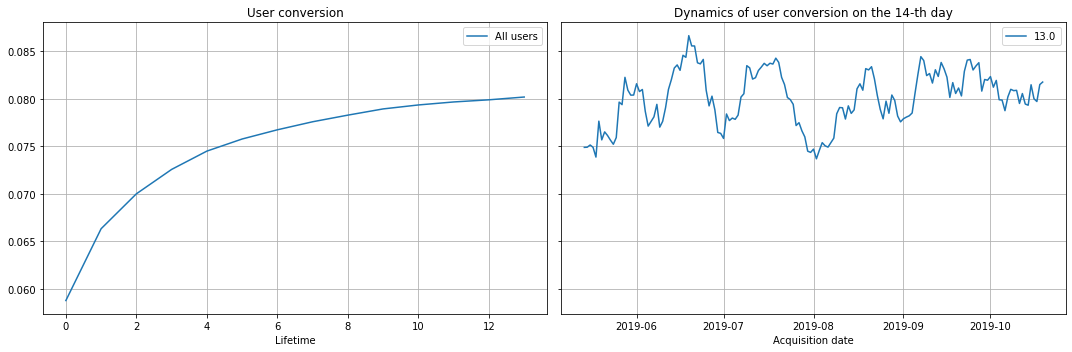

In [37]:
# Conversion Rate
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_new, orders, observation_date, horizon_days)

plot_conversion(conversion, conversion_history, horizon_days, window=14) 

*Graph conclusions:*

- The conversion of all users by the 13th day of lifetime reaches 8%;

- The conversion fluctuates between 7.5 - 8.6%, but in general is quite stable.


*Check Yourself:* When calculating conversions, the sum of cohort sizes should be equal to the total number of new customers in the study period, the number of new customers should be equal to the number of new customers times the total conversion, and the conversion table should not contain values greater than one. Also, in the charts above, the conversion curve smoothly grows from zero towards one and does not decrease, which indicates the correctness of the calculations.

In [38]:
# Conversion Rate
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, ignore_horizon=True)

In [39]:
print(
    # Count unique users in profiles and add up cohort sizes
    'Total number of new users: {} {}'.format(
        len(profiles['user_id']), conversion['cohort_size'].sum()))

Total number of new users: 150008 150008


In [40]:
# Make sure that there are no values greater than one in the conversion tables and conversion dynamics
print(conversion[conversion > 1].fillna('')) 
print()
print(conversion_history[conversion_history > 1].fillna('')) 

           cohort_size 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0  \
cohort                                                                          
All users       150008                                                          

          13.0  
cohort          
All users       

            cohort_size 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0  \
dt                                                                          
2019-05-01          909                                                     
2019-05-02          758                                                     
2019-05-03          849                                                     
2019-05-04         1015                                                     
2019-05-05          970                                                     
...                 ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...   
2019-10-23          739                                                     
2019-10-24 

In [41]:
# Calculate the number of buyers according to the data from the conversion table

print(
    'Number of unique buyers from the conversion table: {:.0f}'.format(
        conversion['cohort_size'][0] * conversion[13][0])) 

# Calculate the number of buyers from purchase data

# take data from users acquired between May 1st and October 27th
report = orders.merge(profiles.query(
    'datetime(2019, 5, 1).date() <= dt <= datetime(2019, 10, 27).date()'), on='user_id')
# calculate lifetime for each purchase
report['lifetime'] = (report['event_dt'] - report['first_ts']).dt.days
# exclude unnecessary lifetimes
report = report.query('lifetime <= 13')

print('Number of unique customers from the orders table: {:.0f}'.format(
        len(report['user_id'].unique()))) 

Number of unique buyers from the conversion table: 8643
Number of unique customers from the orders table: 8643


Excellent, the check showed that the calculations were correct.

Let's calculate user retention and its dynamics by calling the get_retention() and plot_retention() functions.

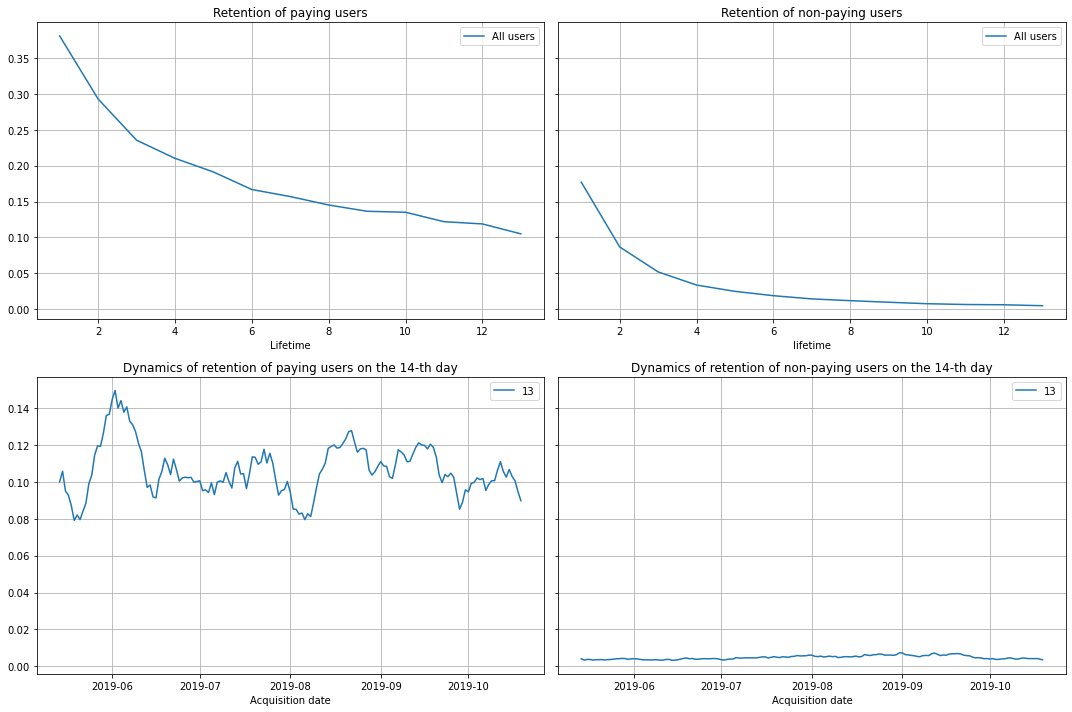

In [42]:
# Retention 
retention_raw, retention, retention_history = get_retention(
    profiles_new, visits, observation_date, horizon_days
)

plot_retention(retention, retention_history, horizon_days, window=14) 

*Graph Conclusions:*

- Paying users are expected to retain better than non-paying users.

- At day 14, the gap between retention of paying and non-paying users is about 10%.


*Check Yourself:* When calculating retention, the sum of cohort sizes and the sum of paying cohort sizes should equal the number of new customers and paying customers in the study period. In addition, in the charts above, retention decreases exponentially and non-paying retention decreases faster than paying retention, which indicates the correctness of the calculations.

In [43]:
# Retenrion
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, ignore_horizon=True)

# Is the sum of cohort sizes equal to the number of new customers in the study period?
print(
    # Count unique users in profiles and add cohort sizes
    'Total number of new users: {} {}'.format(
        len(profiles['user_id'].unique()), retention['cohort_size'].sum()))


# Is the sum of the sizes of paying cohorts equal to the number of buyers in the study period?
print(
    # Count unique paying users in profiles
    # and add the sizes of the paying cohorts
    'Total number of new customers: {} {}'.format(
        len(profiles.query('payer == True')['user_id'].unique()),
        retention.query('payer == True')['cohort_size'].sum()))

Total number of new users: 150008 150008
Total number of new customers: 8881 8881


Excellent, the check showed that the calculations were correct.

#### 5.2 ROI by device

Let's analyze the ROI of advertising by device. We will build LTV and ROI charts, as well as charts of LTV, CAC and ROI dynamics.

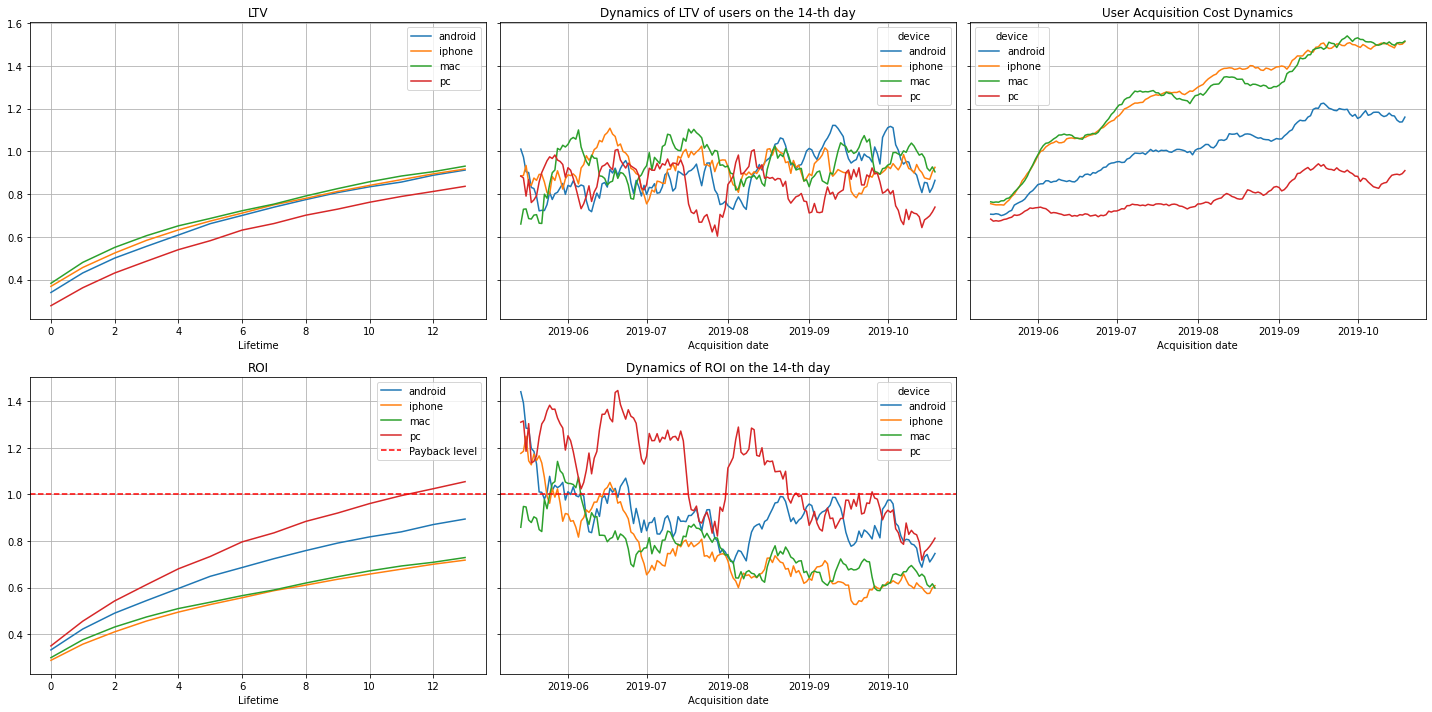

In [44]:
# ROI by device

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_new, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

*Graph Conclusions:*

- Advertising pays off only for PC.

- Android is in second place in terms of ROI, but at the end of the two-week period, its ROI is only 90%.

- At the same time, the dynamics of changes in the return on investment shows that since the beginning of September, not a single type of device has paid off.

- CAC constantly increases synchronously for all platforms, but most strongly for Mac and iPhone.

- The LTV indicator over time is quite stable. The reason for the unprofitability is not the deterioration in the quality of users.

- The reason for the unprofitability is most likely not in the specific device of the first entry.



#### 5.3 ROI by country

Let's analyze the payback of advertising by country. We will build LTV and ROI charts, as well as charts of LTV, CAC and ROI dynamics.

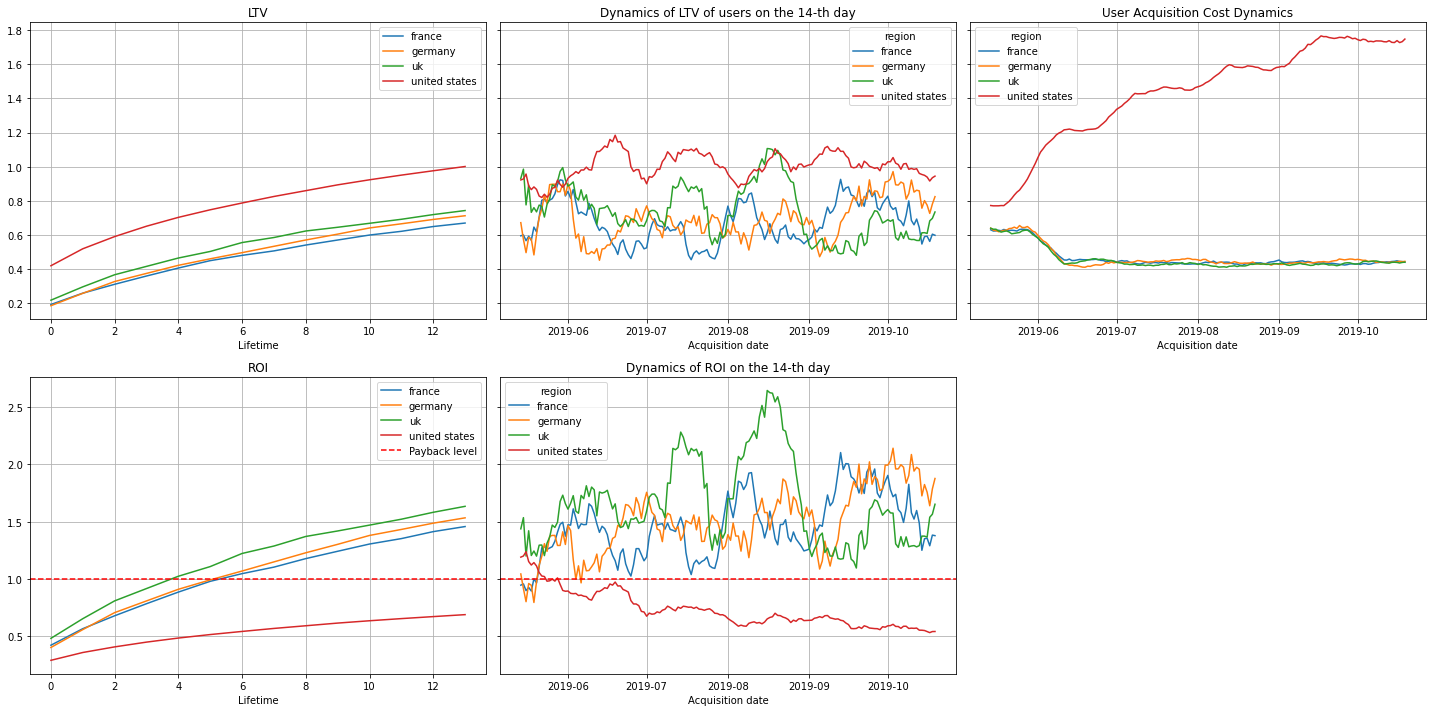

In [45]:
# ROI by country
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_new, orders, observation_date, horizon_days, dimensions=dimensions)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

*Graph Conclusions:*

- Looks like a clue has been found! All countries except the USA pay off. At the end of the two-week period, his ROI is about 70%. The rest of the countries pay off steadily.

- The dynamics of ROI change shows that the USA did not pay off almost from the very beginning of the period taken for analysis.

- CAC in the US is growing in leaps and bounds: the company spends more and more money on this region every time and every time it attracts new customers worse and worse. Most likely, the increase in the price of the user was on each advertising campaign, since the CAC grows very sharply.

- For other platforms, there is a decrease in the average cost of attracting a client.

- However, the lifetime value of a customer in the US is the highest.

- LTV over time is quite stable over time.


That is, in the USA the average lifetime value of a client is higher than in other regions, but clients from the USA are attracted very weakly - they have a high cost per client, and it is constantly growing.


*Intermediate recommendation for marketing department:* 

Check the site/app in the US region for technical problems (maybe payment from this region is not going through, or the site opens crookedly). It is also worth reconsidering the marketing strategy (perhaps it is worth redirecting investments to other regions, and not "flooding" this market with money). To find out the reasons for the failure to pay off in the United States, it is probably worth examining competitors in this market.


#### 5.4 ROI by advertising channel

Let's analyze the payback of advertising with a breakdown by advertising channels. We will build LTV and ROI charts, as well as charts of LTV, CAC and ROI dynamics.

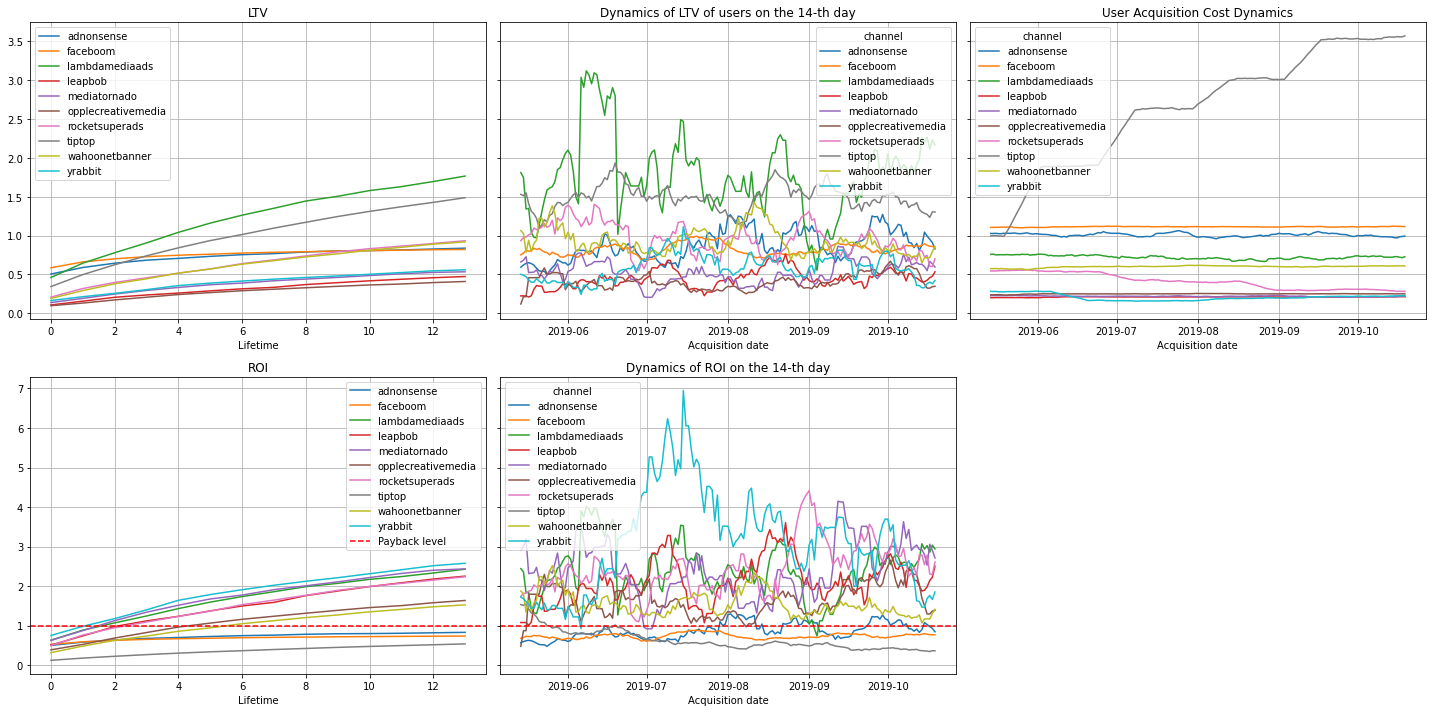

In [46]:
# ROI broken down by advertising channels
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_new, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

*Conclusions from the graph:*

- Advertising does not pay off for Adnonsense, Faceboom and TipTop platforms;

- The situation with the TipTop attraction channel is deplorable. CAC is growing in leaps and bounds: each time the company spends more and more money on this acquisition channel, and each time it attracts new customers worse and worse. Most likely, the price of the user went up on each advertising campaign, since CAC grows very sharply - one advertising campaign in TipTop brought one user for 2.6, the next - already for 3, and so on. If at the beginning of May the average cost of a customer is 1, then by the end of October it reaches 3.5. According to the dynamics of the acquisition cost, this channel almost never paid off.

- For comparison, the second Faceboom channel in terms of investments in marketing shows an absolutely stable and not volatile CAC of about 1.1 (that is, the company did the right thing by investing more and more money in this channel every month).

- The rest of the CAC dynamics are quite stable and equal to 0.25 - 1.

- The highest LTVs from the source LambdaMediaAds and TipTop (by the 13th day of lifetime, the lifetime cost of a user is approximately 1.75 and 1.5, respectively).



*Intermediate recommendation for the marketing department:* 

It is necessary to revise the marketing strategy for the TipTop channel - despite the large investment, advertising on this channel does not pay off, and with each advertising campaign the price per client increases. It is worth taking a closer look at the Faceboom channel in order to increase marketing investments, since even with increased investments it shows a stable CAC.

#### 5.5 Retention by Acquisition Channel

Let's check if the loss problem is related to user retention from different channels/countries/devices.

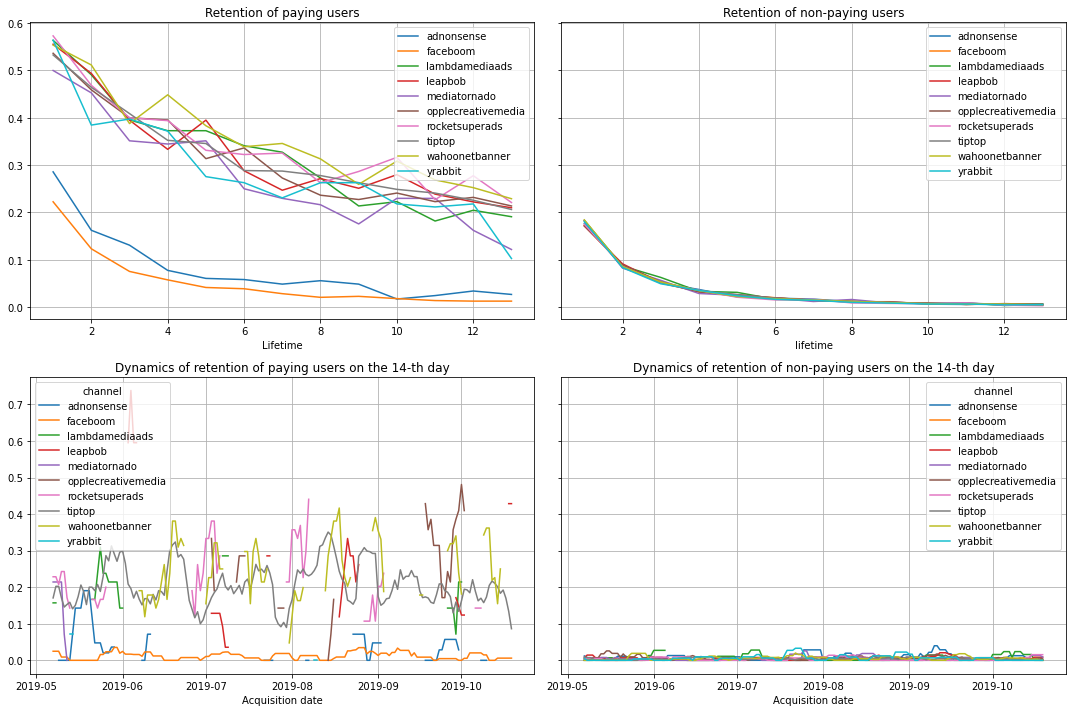

In [47]:
# Retention by acquisition channel
dimensions=['channel']

retention_raw, retention, retention_history = get_retention(
    profiles_new, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention, retention_history, horizon_days) 

*Graph Conclusions:*

- Perhaps the reason for the unprofitability is the retention of some channels: Faceboom and Adnonsense are retained worse than others.

- The dynamics of changes in the retention of paying users on day 14 was calculated "crooked", which may indicate a weak retention for many acquisition channels on day 14 ("zero" retention in the data).

- The dynamics of retention of non-paying users on the 14th day is consistently lower than the retention of paying users.


#### 5.6 Retention by country

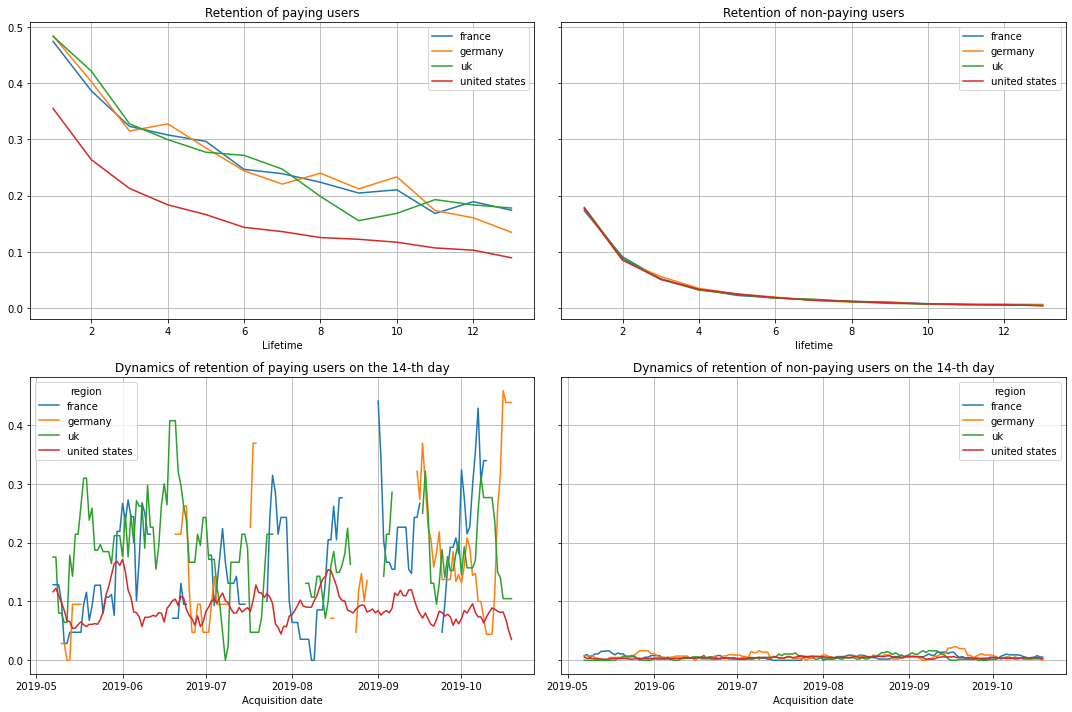

In [48]:
# Retention by country
dimensions=['region']

retention_raw, retention, retention_history = get_retention(
    profiles_new, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention, retention_history, horizon_days)

*Graph Conclusions:*

- A similar picture with unprofitability for regions: retention of users from the US is worse than retention in other regions. The likely reason for the unprofitability is poor retention of paying users from the States.

- The dynamics of changes in the retention of paying users on day 14 was calculated "crooked", which may indicate a weak retention for many acquisition channels on day 14 ("zero" retention in the data).

- The dynamics of retention of non-paying users on the 14th day is consistently lower than the retention of paying users.


#### 5.7 Retention by device

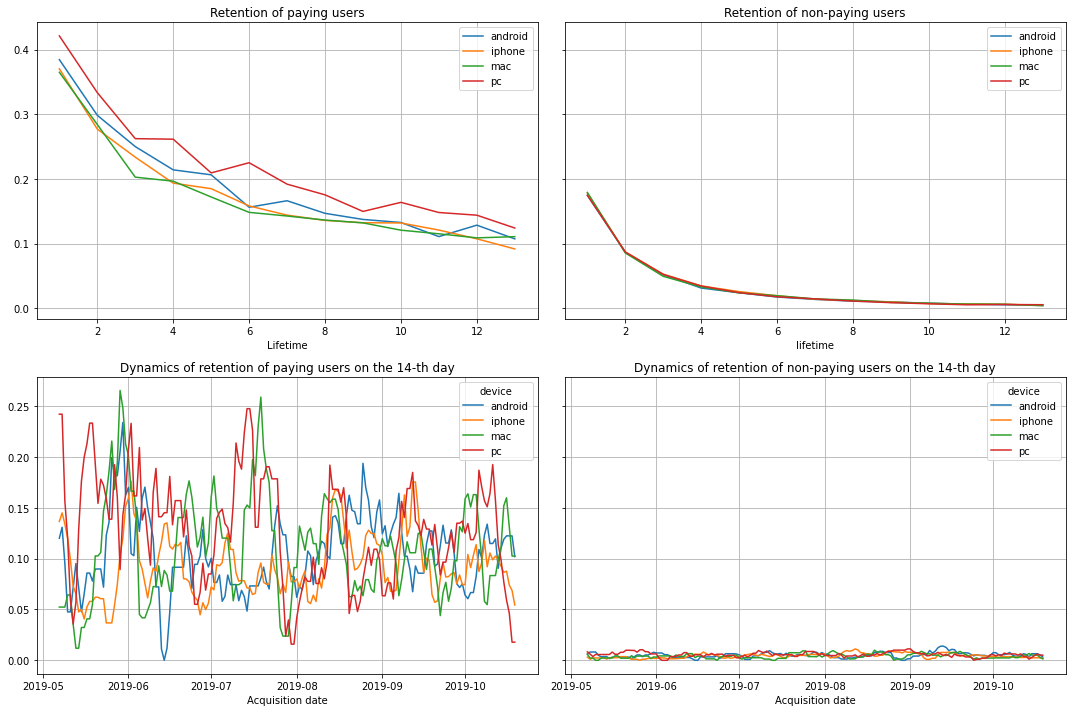

In [49]:
# Retention by device
dimensions=['device']

retention_raw, retention, retention_history = get_retention(
    profiles_new, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention, retention_history, horizon_days)

*Graph Conclusions:*

It seems the reason for the unprofitability is not the retention of a certain type of device: in general, the graphs look normal (only the dynamics for paying users "jumps" a lot).



Let's check if the loss problem is related to user retention from different channels/countries/devices.


#### 5.8 Conversion by Acquisition Channel

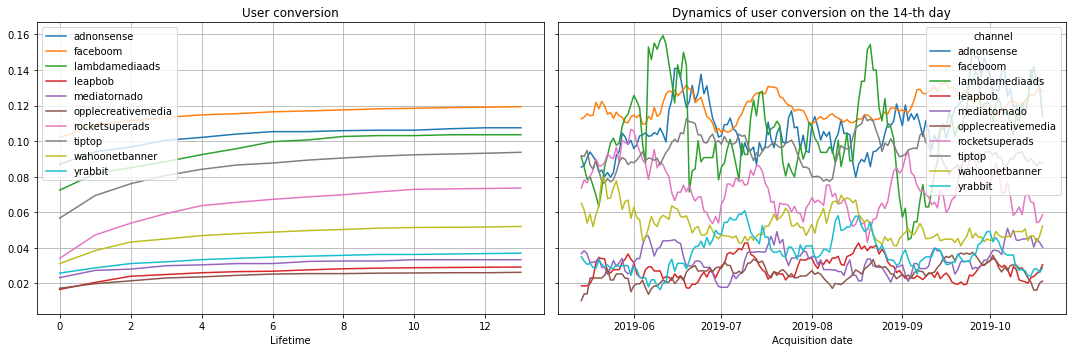

In [50]:
# Look at the conversion split by acquisition channels
dimensions=['channel']

conversion_raw, conversion, conversion_history = get_conversion(
    profiles_new, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion, conversion_history, horizon_days, window=14) 

*Graph Conclusions:*

- Conversion for different types of devices on the 13th day of lifetime ranges from 0.023 to 0.12, but there are no big "gaps" - apparently just a certain channel has one or another conversion.

- The dynamics of conversion for all channels is quite stable, except for the conversion for LabdaMediaAds - there is a strong "failure" in early September.


#### 5.9 Conversion by country

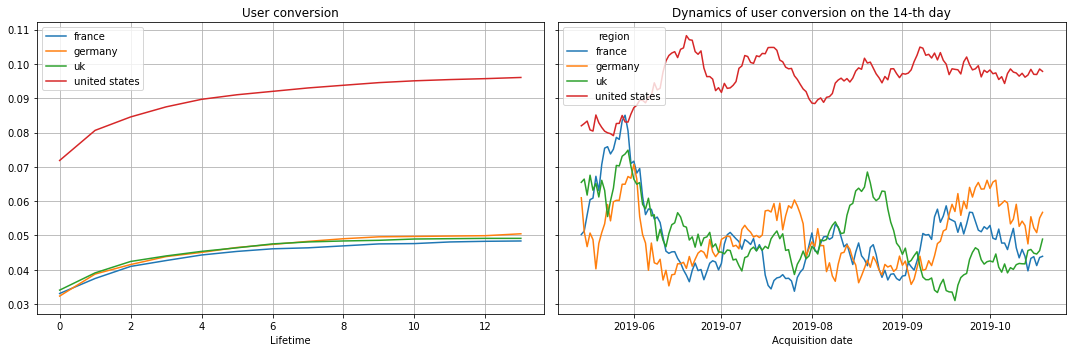

In [51]:
# Conversion by country
dimensions=['region']

conversion_raw, conversion, conversion_history = get_conversion(
    profiles_new, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion, conversion_history, horizon_days, window=14) 

*Graph Conclusions:*

Conversion in the US is consistently much higher than in other regions. That is, the reason for the unprofitability in the US is not a weak conversion in this region.



#### 5.10 Conversion by device

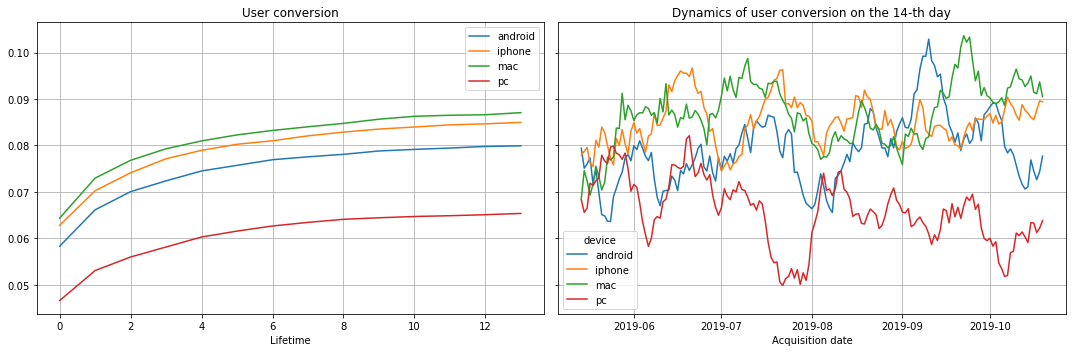

In [52]:
# Conversion by device
dimensions=['device']

conversion_raw, conversion, conversion_history = get_conversion(
    profiles_new, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion, conversion_history, horizon_days, window=14) 

*Graph Conclusions:*

- The conversion for PC users is much lower than the conversion from other devices - there may be technical problems with paying on the site in the PC version.

- Problems with conversion for PC arose in early June and late July. The rest of the time, the conversion just slowly decreased for this type of device.



*Intermediate conclusions:*

**1) Pay off problems in the US**

- All countries pay off except the USA. At the end of the two-week period, their ROI is about 70%. The rest of the countries pay off steadily.

- The dynamics of ROI change shows that the USA did not pay off almost from the very beginning of the period taken for analysis.

- CAC in the US is growing in leaps and bounds: the company spends more and more money on this region every time and every time it attracts new customers worse and worse. Most likely, the increase in the price of the user was on each advertising campaign, since the CAC grows very sharply.

- For other platforms, there is a decrease in the average cost of attracting a client.

- However, the lifetime value of a customer in the US is the highest

- Probable **reason for unprofitability - low retention of paying users**.


**2) Payback issues for users from TipTop, Adnonsense and Faceboom**


- The situation with the TipTop attraction channel is deplorable. Probable **reason for the channel's failure to pay off - CAC is growing**. According to the dynamics of the acquisition cost, this channel almost never paid off.

- The second Facebook channel in terms of investments in marketing shows an absolutely stable and not volatile CAC. The probable **reason for the channel's failure to pay off is low retention of paying users**.

- The probable **reason for Adnonsense channel's failure to pay off is low retention of paying users**.

### 6. General conclusions

*Project goal:* to find the reasons for the unprofitability of Procrastinate Pro + based on the data about users attracted during advertising campaigns from May 1 to October 27, 2019. Date of analysis: November 1, 2019.


*Findings:*

**1) Countries**
- Users come from the US, Germany, France and the UK.
- Most of registered and paying users - from the USA (almost 7%).
- Despite the fact that Germany has the fewest registered users, the region ranks second in terms of paying users (4.1%).


**2) Devices**
- Users use iPhone, Android, PC and Mac devices.
- The largest number of clients access the application from iPhone devices.
- Paying users prefer Mac devices more, despite the lowest number of visits from this type of devices (percentage of purchases from Mac - 6.4%).
- iPhone among paying users is in second place (6.2% of purchases).


**3) Advertising sources**
- Most paying users come from the Facebook channel (12.2% of customers made a purchase).
- Also potentially profitable in terms of a large proportion of paying users are Adnonsense (11.3%), LambdaMediaAds (10.5%) channels, although they attracted much fewer users; as well as TipTop (9.6%).


**4) Marketing spending**
- 105,497 were spent on all advertising campaigns.
- Average CAC - 0.7
- More than half (52%) of the advertising budget went to the TipTop channel (55 thousand).
- Almost a third (31%) of the advertising budget went to the Facebook channel (32.5 thousand).
- Least of all money was spent on LambdaMediaAds channels (1.5k - 1.5% of the total budget), MediaTornado (954 - 0.9%) and Yrabbit (944 - 0.9%).
- Spending on TipTop and Faceboom channels is growing dramatically every month (perhaps with every advertising campaign).
- Spending on TipTop and Faceboom channels are growing in sync.
- Synchronicity in spending, but much less pronounced, can be traced for other channels.


**5) CAC**
- TipTop - 2.79
- Faceboom - 1.11
- Adnonsense - 1.01
- LambdaMediaAds - 0.74
- Wahoo Net Banner - 0.6
- RocketSuperAds - 0.42
- OppleCreativeMedia-0.25
- Media Tornado - 0.22
- Yrabbit - 0.21
- Leapbob - 0.21 - more than 10 times lower than TipTop.
- The average cost per customer acquisition for the TipTop channel is 2.79, which is more than 2.5 times higher than the same indicator for Faceboom. Despite the huge investment in the TipTop channel, the cost per user is very high!


**6) Payback**
- Advertising in general does not pay off. ROI at the end of the two-week period is about 80%.
- Pay off all countries except the USA. At the end of the two-week period, their ROI is about 70%.
- Advertising does not pay off for Adnonsense, Faceboom and TipTop platforms.
- Advertising pays off only for PC. But most likely the reason for the lack of pay is not in the type of devices, since the dynamics of changes in the return on investment shows that since the beginning of September, no type of device has paid off, and CAC is constantly increasing synchronously for all platforms.
- The dynamics of ROI change shows that the USA did not pay off almost from the very beginning of the period taken for analysis.
- CAC in the US and for TipTop is growing in leaps and bounds: the company spends more and more money on the US and TipTop each time, and each time it gets worse and worse at attracting new customers. Most likely, the increase in the price of the user was on each advertising campaign, since the CAC grows very sharply.
- For comparison, the second Facebook channel by the amount of investment in marketing shows an absolutely stable and not volatile CAC of about 1.1.
- Overall LTV over time is quite stable. The reason for the unprofitability is not the quality of users decreasing.



**Recommendation to Marketing Department**

1) The main reason for non-payback is the US market and promotion channels TipTop, Faceboom and Adnonsense.

2) It is necessary to check the site / application in the US region for technical problems (maybe payment from this region does not go through, or the site opens crookedly), review the marketing strategy for this market and study competitors, because despite the fact that the market is leading - it just doesn't pay off.

4) It is necessary to revise the marketing strategy for the TipTop channel - despite the large investments, advertising on this channel does not pay off, CAC is constantly growing, and with each advertising campaign, the price per client increases.

5) It is worth continuing to invest in the Faceboom channel, as it shows a stable CAC even with investments that have already grown. But you need to work on retaining paying users.

6) Need to work on retention of paying users for the Adnonsense channel.